In [3]:
% matplotlib inline

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

boston = datasets.load_boston()


AttributeError: head

In [5]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64

In [10]:
y = boston.target

In [11]:
#test_size=0.4 means a 40:60 split
#adjust that to change split ratio of data testing
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(303, 13) (303,)
(203, 13) (203,)


In [12]:
lm = linear_model.LinearRegression()

In [13]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
model = lm.fit(X_train, y_train)

In [15]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
predictions = lm.predict(X_test)
predictions

array([ 33.23152018,  22.33324589,  20.35702156,  21.31133993,
        16.72145661,  13.36014578,  20.48244734,  15.89977003,
        17.1425556 ,  33.48965781,  25.23317814,  20.58985351,
        23.15541925,  13.44076328,  24.81390267,  13.32855116,
        24.25487848,  18.56734116,  15.15587417,  33.51992683,
        26.81290327,  14.79641932,  29.97703423,  34.20287718,
        26.42205415,  14.04127688,  20.5678379 ,  23.70601073,
        33.07530953,  17.49827515,  17.78886313,  21.64155779,
        20.18897283,  11.12524342,  21.71006909,   9.42704767,
        20.81749266,  24.69710283,  39.99056886,  32.07582366,
        11.95268907,  20.78701974,  20.81765852,  22.40052986,
        18.11521971,  30.67033206,  24.1711301 ,  25.26149664,
        27.79894737,  37.43702503,  25.08899893,  15.48320867,
        14.42720353,  18.75333352,  23.35080682,  21.60225467,
        19.67350495,  18.58620515,  16.9493995 ,  18.22394799,
        26.8055512 ,  20.01590619,  23.01095818,  15.35

Score: 0.727844624993


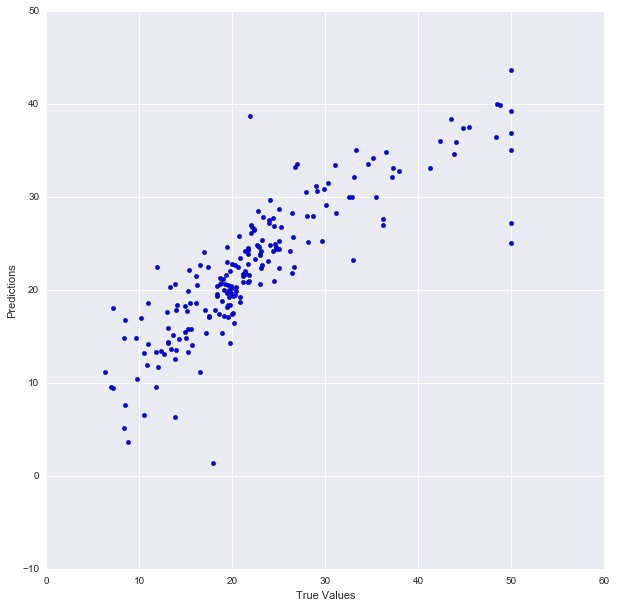

In [17]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test) 

In [20]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(lm, df, y, cv=6)
print "Cross-validated scores:", scores


Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]


Cross-Predicted Accuracy: 0.537671767736


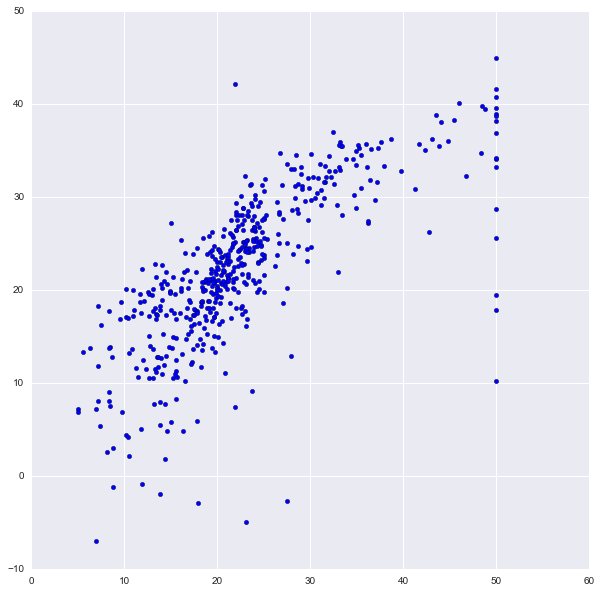

In [21]:
# Make cross validated predictions

predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [23]:
predictions.shape

(506,)

In [25]:
#Practice above with different splits of 50:50, 70:30, 90:10
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(253, 13) (253,)
(253, 13) (253,)


In [29]:
lm = linear_model.LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
model = lm.fit(X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
predictions = model.predict(X_test)
predictions

array([ 25.85156457,  20.61457848,  19.69656684,  11.3609541 ,
        19.03719169,  18.84789118,  26.94182756,  36.64432177,
        28.24664443,  19.13331412,  20.12166099,  30.64092208,
        18.37517773,  28.84385726,  25.55499018,  28.61055424,
        14.26183006,  35.93380183,  19.61027691,  24.22392629,
        17.75645209,  17.36403412,  29.11616484,  25.5548966 ,
        13.09311803,  13.76474298,  20.68001542,  14.49684048,
        19.5919529 ,  20.72822351,  24.23551596,  16.64711594,
        29.59782694,  21.27953544,  19.1666651 ,  15.30763619,
        22.29684035,  29.78841184,  18.22726466,  21.11887717,
        13.20486814,  15.93825909,  20.88897066,  16.50205439,
        24.0494909 ,  17.50976257,  27.44078007,  32.97316834,
        35.10902208,  29.87714592,  27.73905877,  13.89194396,
        16.60680938,  20.369833  ,  18.8004686 ,  21.03056358,
        13.59366461,  28.11213663,  22.91614543,  21.19488068,
        20.04327916,  18.54433769,  32.20017096,  15.15

Score: 0.690634433479


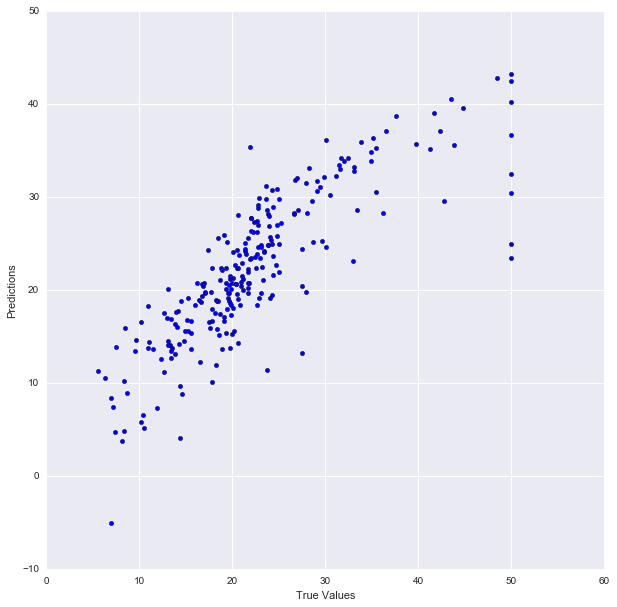

In [32]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test) 

In [33]:
# Perform 6-fold cross validation
scores = cross_val_score(lm, df, y, cv=6)
print "Cross-validated scores:", scores

Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]


Cross-Predicted Accuracy: 0.537671767736


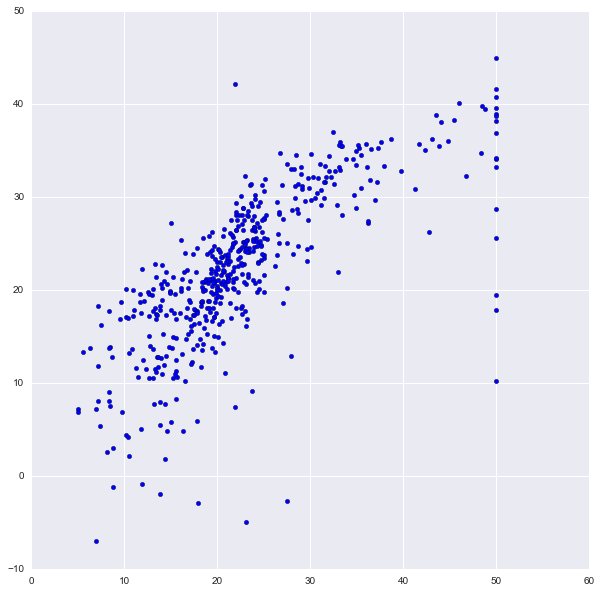

In [34]:
# Make cross validated predictions

predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [36]:
#70:30 split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.7)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(151, 13) (151,)
(355, 13) (355,)


In [37]:
lm = linear_model.LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
model = lm.fit(X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
predictions = model.predict(X_test)
predictions

array([ 18.29883349,  23.53323751,  22.43950572,  24.66486901,
        15.60282757,   8.66779097,  24.19959796,  16.16408119,
        21.33326232,  29.48096705,  17.65412453,  13.48030839,
        21.39636684,  21.61781356,   7.91413235,  20.570248  ,
        32.28045828,  11.49932608,   8.93175302,  15.83203822,
        21.278612  ,  23.87037693,  24.9248567 ,  28.94420785,
        14.29740346,  20.09816539,  19.89284451,  21.22686339,
        17.96953673,  16.16379076,  33.73412772,  20.19853962,
        29.45906698,  22.43825386,  23.51162868,  21.26150782,
        22.15205446,  23.42689351,  22.9384595 ,  18.03772262,
        40.70892467,  31.40744116,  20.06888538,  19.64034438,
        30.60328242,  18.7924965 ,  31.3328367 ,  19.52850973,
        19.95897208,  17.95717191,  41.40307371,  20.24990189,
        18.54119655,  36.81686824,  22.03614489,  17.41480736,
        12.4215777 ,  14.79847763,  20.70178152,  36.64570251,
        19.22252948,  43.78206752,  24.09362551,  21.26

Score: 0.663784955594


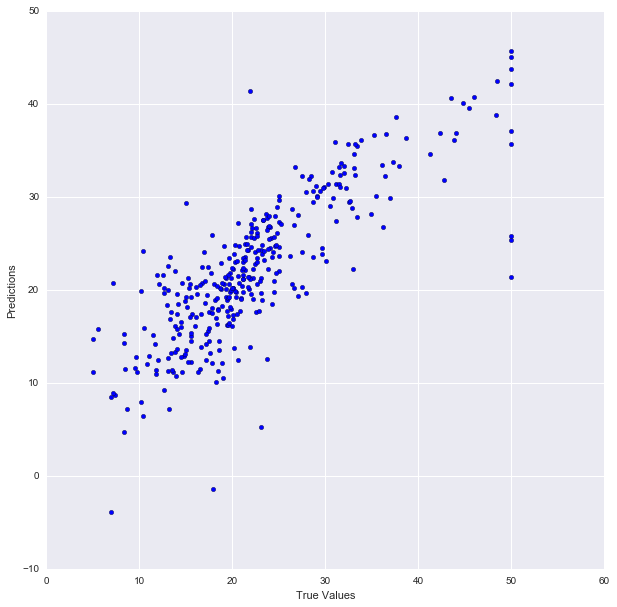

In [40]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test) 

In [41]:
# Perform 6-fold cross validation
scores = cross_val_score(lm, df, y, cv=6)
print "Cross-validated scores:", scores

Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]


Cross-Predicted Accuracy: 0.537671767736


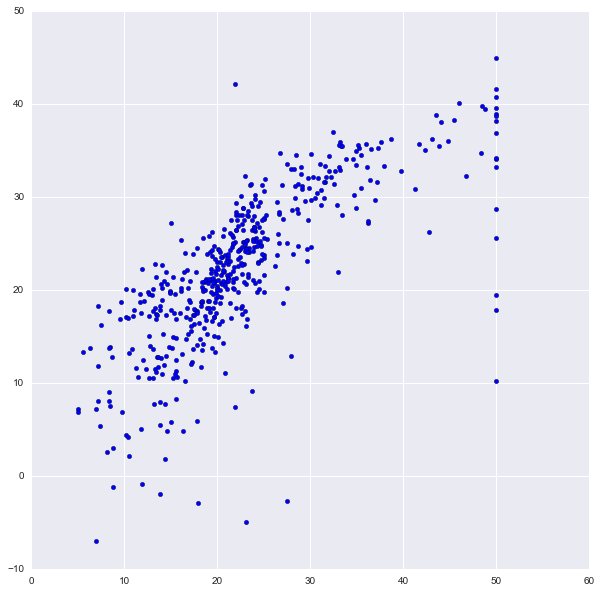

In [42]:
# Make cross validated predictions

predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [43]:
#90:10 split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.7)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(151, 13) (151,)
(355, 13) (355,)


In [44]:
lm = linear_model.LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
model = lm.fit(X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
predictions = model.predict(X_test)
predictions

array([ 19.4320339 ,   8.89362227,  17.78644117,  24.47369852,
         7.56813657,  16.8087898 ,  14.96451013,  27.60174249,
        28.96547452,  32.94650923,  30.40378953,  23.8297598 ,
        15.51690346,  29.1772871 ,  20.96216967,  18.8027697 ,
        32.75895967,  19.98367991,  22.04423524,  19.79994006,
        15.30074195,  18.03146411,  31.92824786,  15.63777363,
        14.36933326,  43.25556449,  35.36228132,  14.61618699,
        25.85483426,  35.33464376,  14.12752677,  13.30609631,
        26.79952731,   7.56498072,  20.55778696,  23.88891938,
        31.0678832 ,  37.33985096,  23.3371744 ,  24.31423588,
        35.11603264,  23.99021917,  28.78268308,  19.68625527,
        20.02144771,  23.12555671,  22.86656147,  23.58138134,
        18.68867367,  41.12355794,  21.32299976,  18.27764108,
        23.08735235,  34.69493943,  30.6743146 ,  33.4361231 ,
        23.3573183 ,  20.02832857,  19.2179468 ,  12.13561862,
        22.82737547,  42.10054005,  18.12217309,  20.85

Score: 0.722215056316


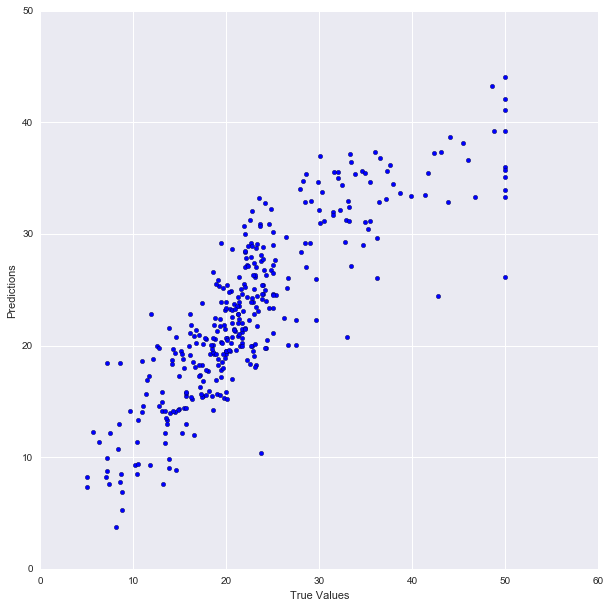

In [47]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test) 

In [48]:
# Perform 6-fold cross validation
scores = cross_val_score(lm, df, y, cv=6)
print "Cross-validated scores:", scores

Cross-validated scores: [ 0.64224005  0.61152091  0.51447066  0.78503274 -0.14367345 -0.01539034]


Cross-Predicted Accuracy: 0.537671767736


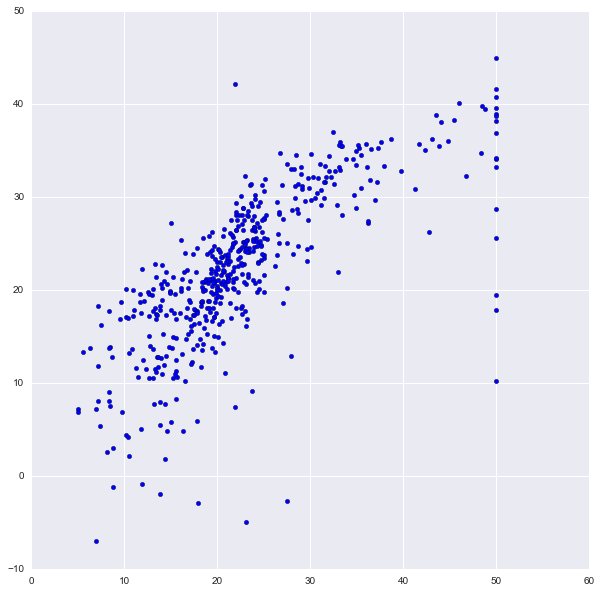

In [49]:
# Make cross validated predictions

predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [51]:
fifty_fifty = []
for i in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)       
    fifty_fifty.append(model.score(x_test, y_test))
print np.std(fifty_fifty), np.mean(fifty_fifty)

sixty_fourty = []
for i in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)      
    sixty_fourty.append(model.score(x_test, y_test))
print np.std(sixty_fourty), np.mean(sixty_fourty)

ninety_ten = []
for i in range(1,11):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.1)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)     
    predictions = lm.predict(x_test)    
    ninety_ten.append(model.score(x_test, y_test))
print np.std(ninety_ten), np.mean(ninety_ten)

0.0396902317056 0.689281506591
0.0325282102408 0.702698554788
0.105302251417 0.694561247647


In [52]:
fifty_fifty = []
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)       
    fifty_fifty.append(model.score(x_test, y_test))
print "50/50 Std: ", np.std(fifty_fifty)

sixty_fourty = []
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)      
    sixty_fourty.append(model.score(x_test, y_test))
print "60/40 Std: ", np.std(sixty_fourty)

ninety_ten = []
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.1)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)     
    predictions = lm.predict(x_test)    
    ninety_ten.append(model.score(x_test, y_test))
print "90/10 Std: ", np.std(ninety_ten)

50/50 Std:  0.0353321779001
60/40 Std:  0.0391373261956
90/10 Std:  0.118163105158


In [53]:
df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

In [54]:
xs = df[['TAX', 'CRIM', 'CHAS']]

In [55]:
xs.head()

,TAX,CRIM,CHAS
0,296.0,0.00632,0.0
1,242.0,0.02731,0.0
2,242.0,0.02729,0.0
3,222.0,0.03237,0.0
4,222.0,0.06905,0.0


In [ ]:
#below is practice testing

In [56]:
 x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)

In [57]:
lm = linear_model.LinearRegression()

In [58]:
model_1 = lm.fit(x_train, y_train)

In [59]:
model_1.score(x_test, y_test)

0.21955803668324114

In [61]:
xs = df[['TAX', 'CRIM', 'CHAS','DIS', 'AGE']]
xs.head()

,TAX,CRIM,CHAS,DIS,AGE
0,296.0,0.00632,0.0,4.0900,65.2
1,242.0,0.02731,0.0,4.9671,78.9
2,242.0,0.02729,0.0,4.9671,61.1
3,222.0,0.03237,0.0,6.0622,45.8
4,222.0,0.06905,0.0,6.0622,54.2


In [62]:
 x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)

In [63]:
lm = linear_model.LinearRegression()

In [64]:
model_1 = lm.fit(x_train, y_train)

In [65]:
model_1.score(x_test, y_test)

0.22795666165890563

In [67]:
#some new variables
xs = df[['TAX', 'CRIM', 'CHAS']]
xs.head()
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)
lm = linear_model.LinearRegression() 
model_1 = lm.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.2780893610437426

In [68]:
#some new variables
xs = df[['NOX', 'CRIM', 'RM']]
xs.head()
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)
lm = linear_model.LinearRegression() 
model_1 = lm.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.60061339998033847

In [69]:
#some new variables
xs = df[['LSTAT', 'CRIM', 'RM', 'NOX']]
xs.head()
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)
lm = linear_model.LinearRegression() 
model_1 = lm.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.58539473213566207

In [70]:
#some new variables
xs = df[['LSTAT', 'CRIM', 'INDUS', 'NOX']]
xs.head()
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)
lm = linear_model.LinearRegression() 
model_1 = lm.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.52662012942765035

In [71]:
#some new variables
xs = df[['CHAS', 'CRIM', 'B', 'LSTAT']]
xs.head()
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)
lm = linear_model.LinearRegression() 
model_1 = lm.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.55081471545292471

In [72]:
#some new variables
xs = df[['DIS', 'CRIM', 'RM', 'NOX']]
xs.head()
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size=0.5)
lm = linear_model.LinearRegression() 
model_1 = lm.fit(x_train, y_train)
model_1.score(x_test, y_test)

0.55027031616094457